発見されたCSVファイル数: 16


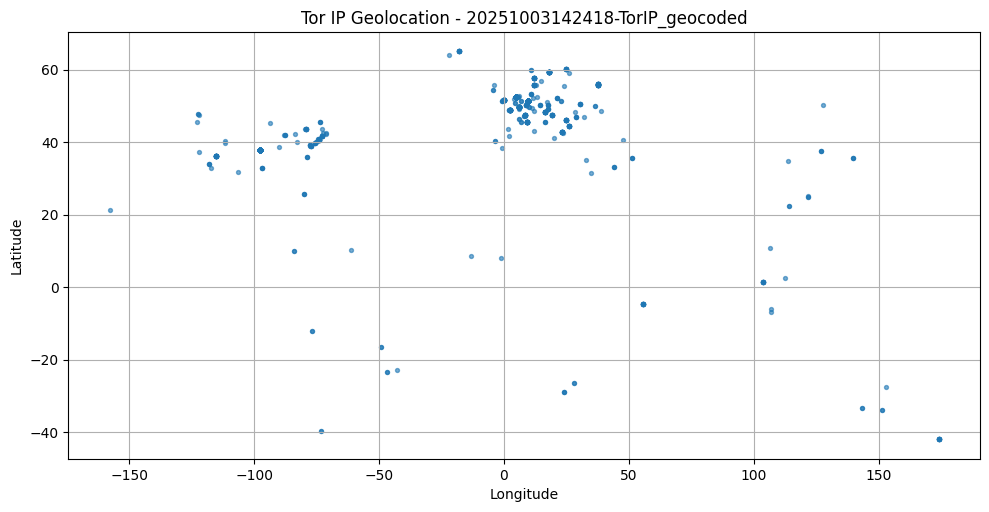

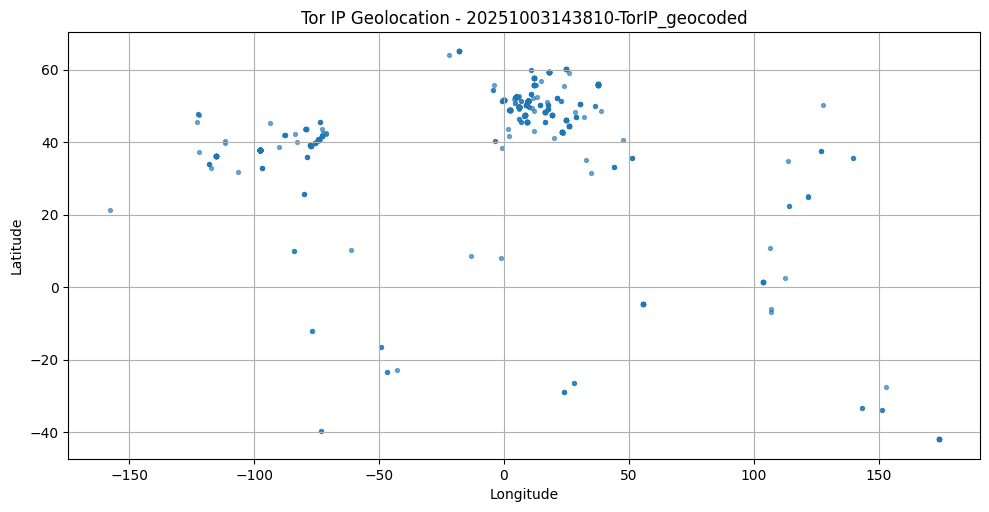

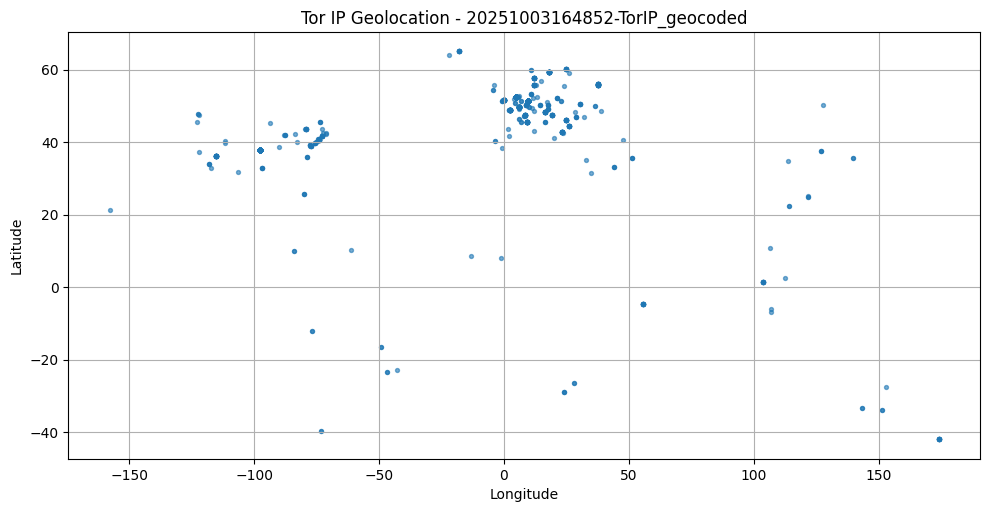

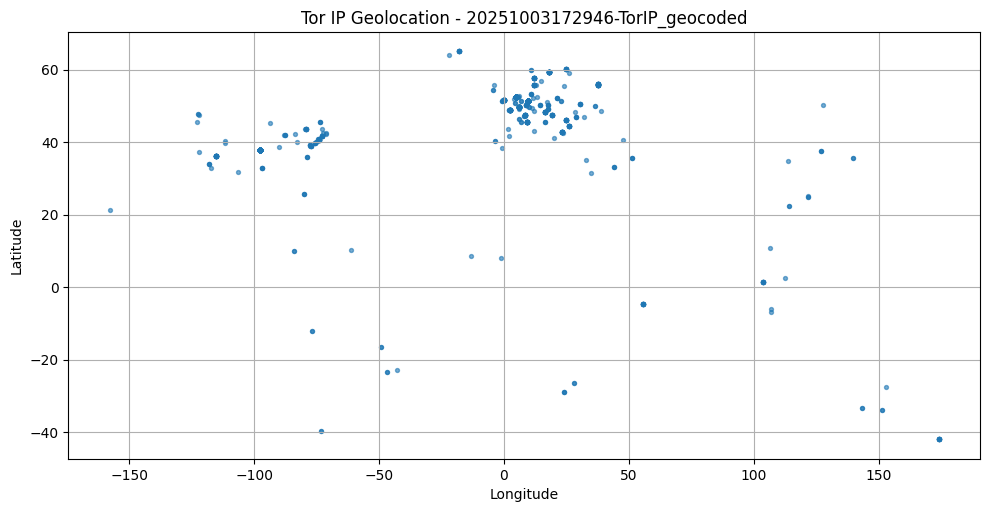

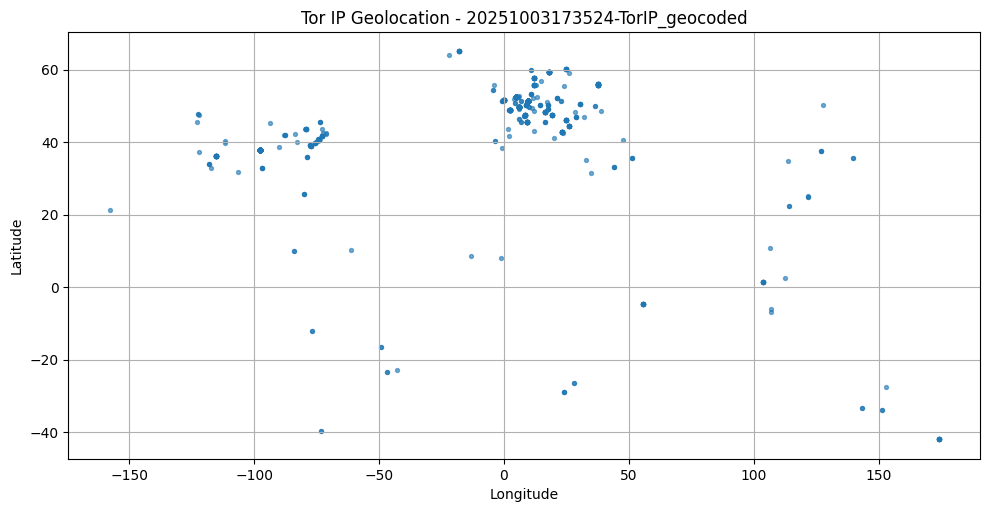

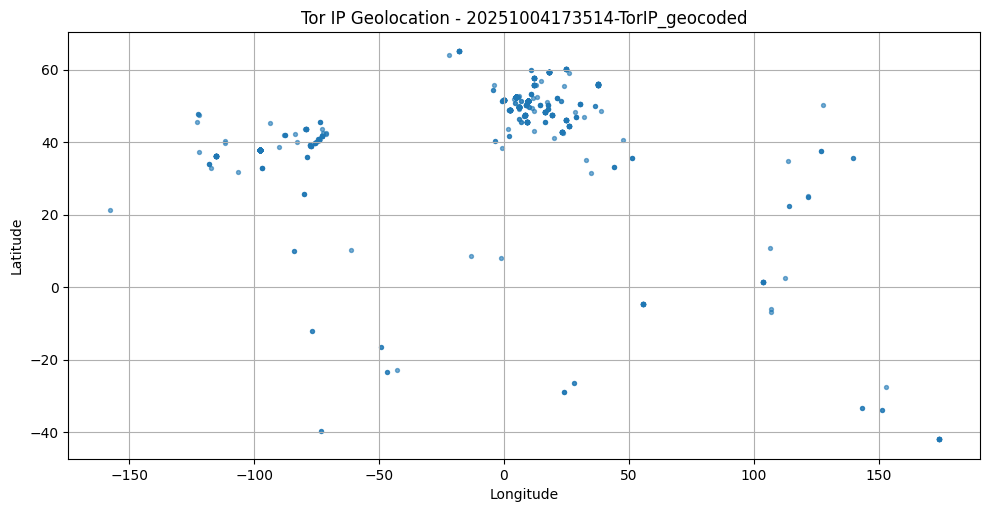

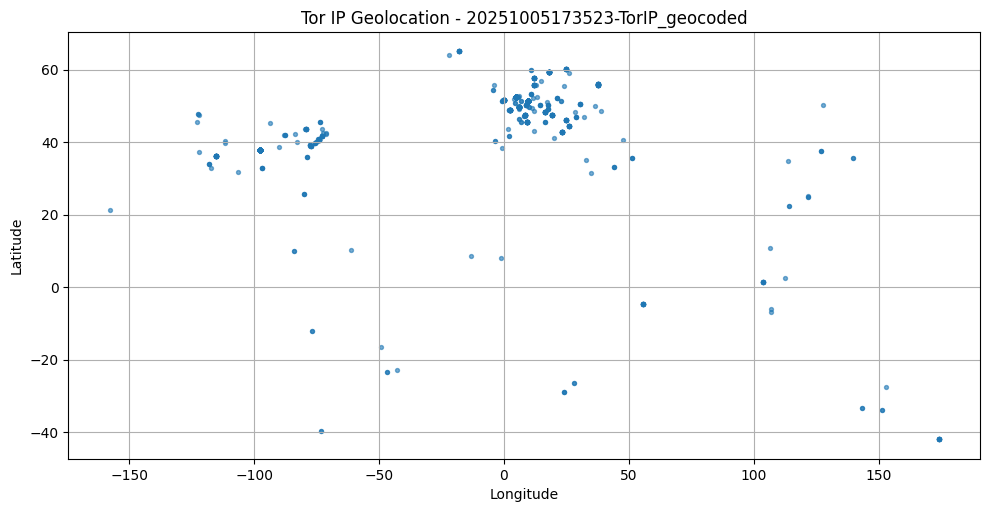

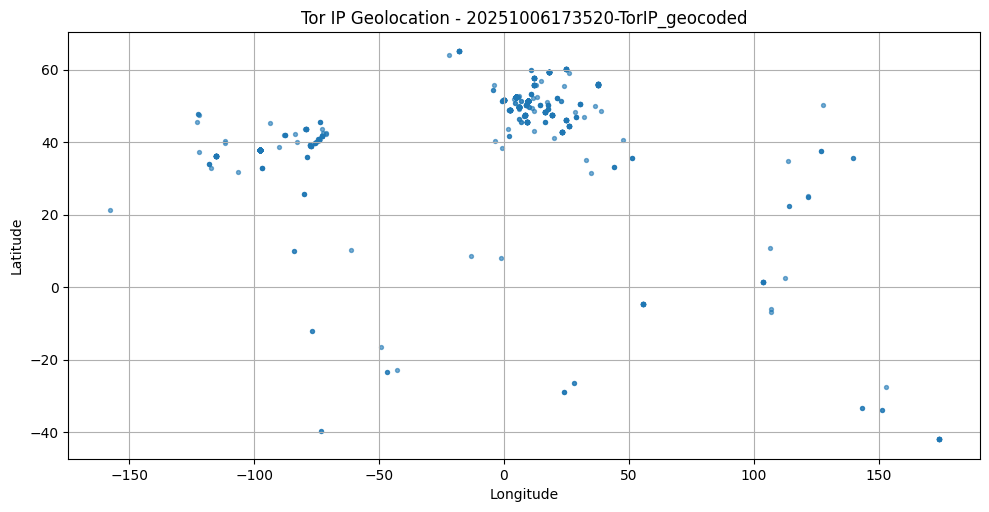

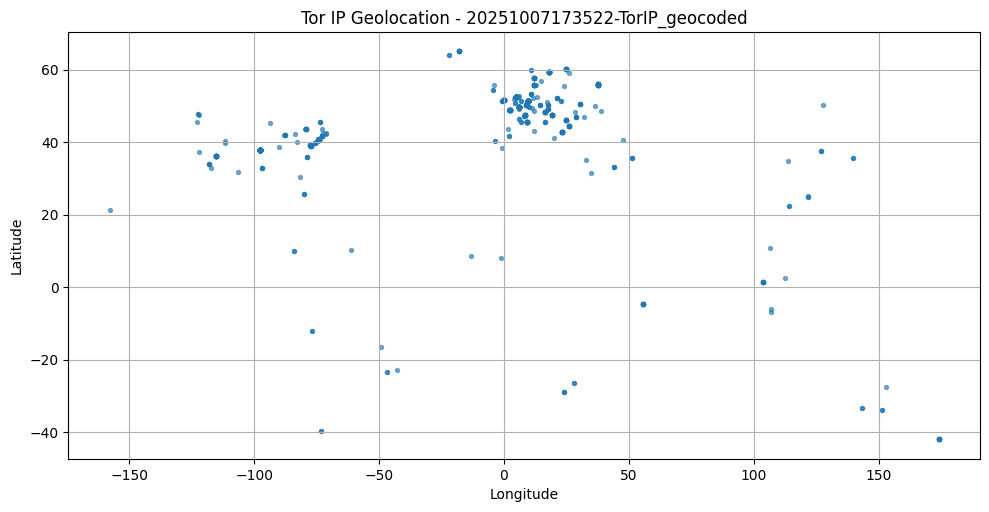

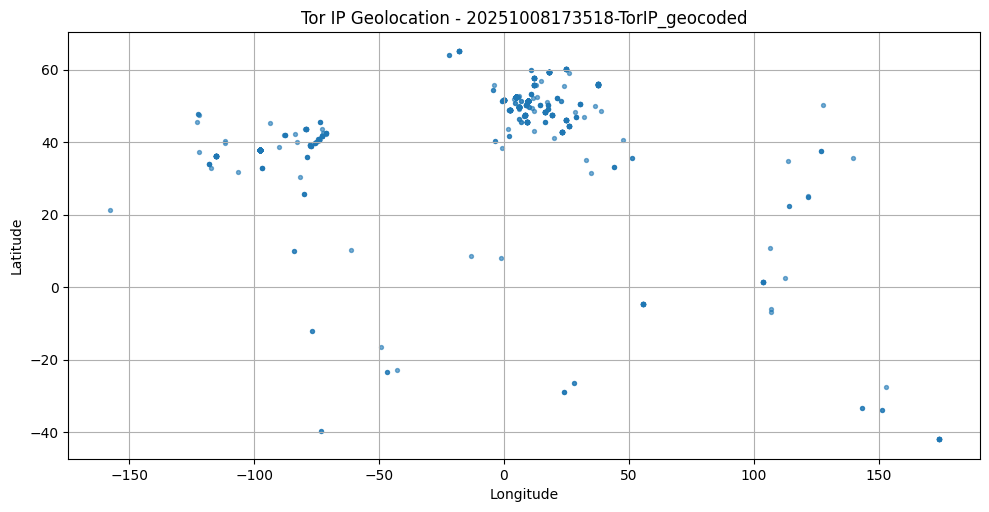

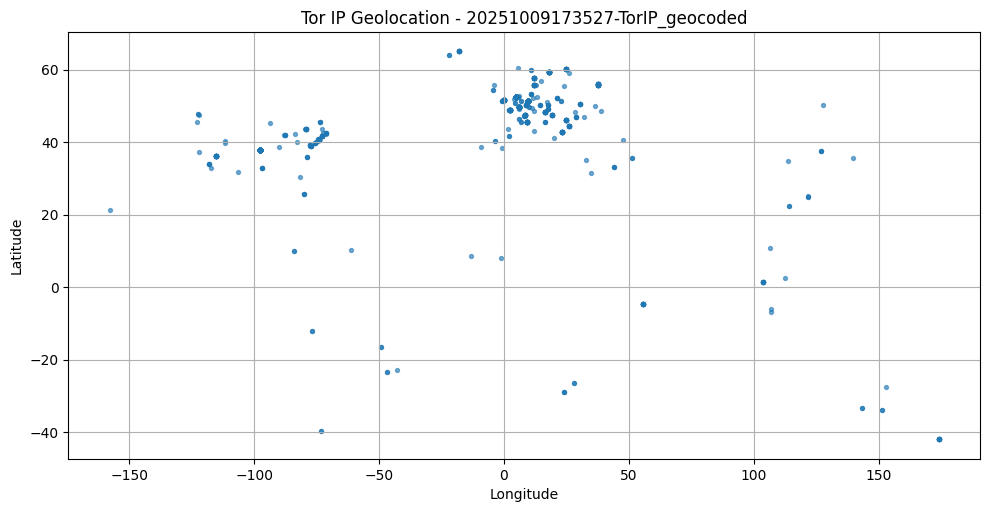

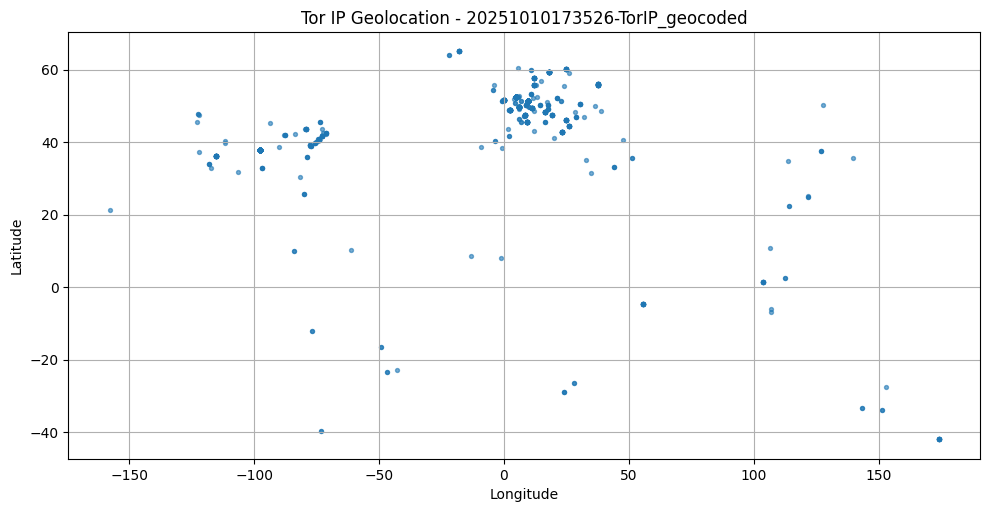

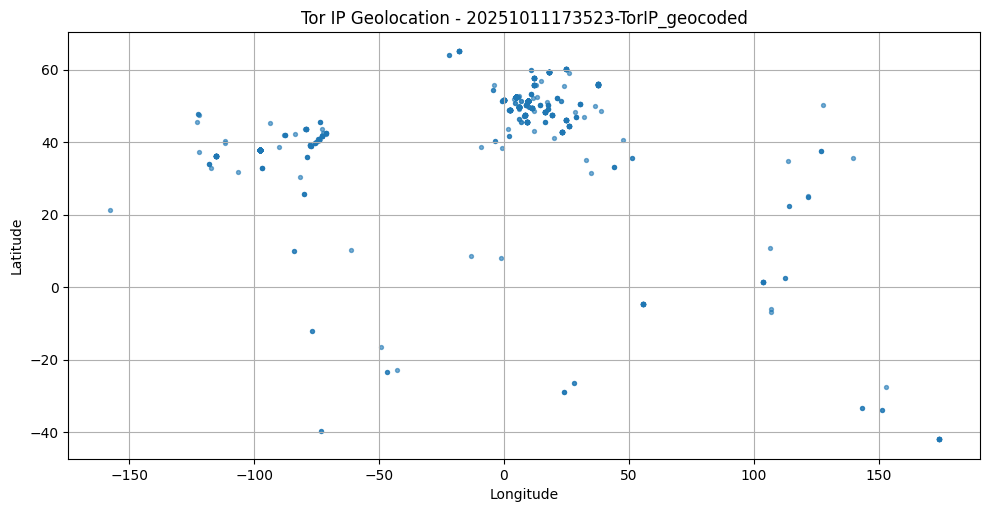

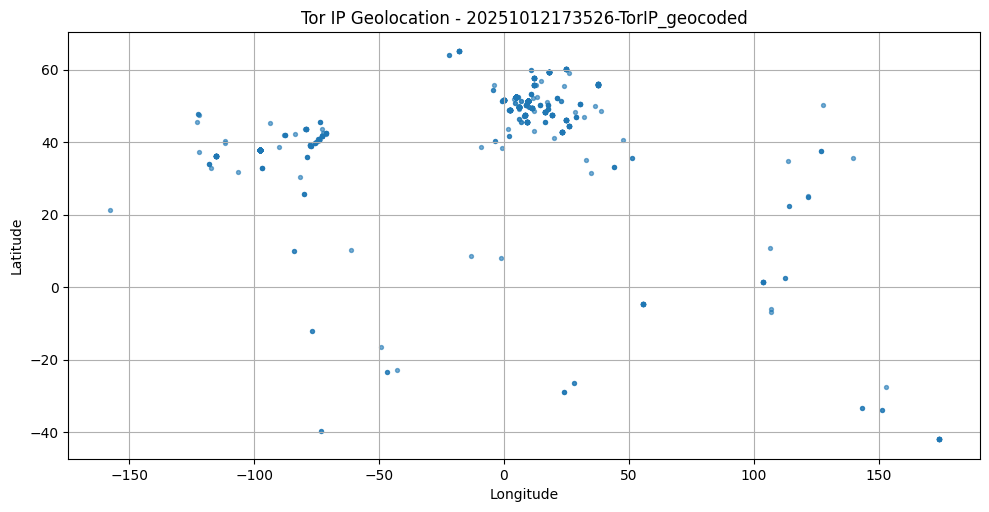

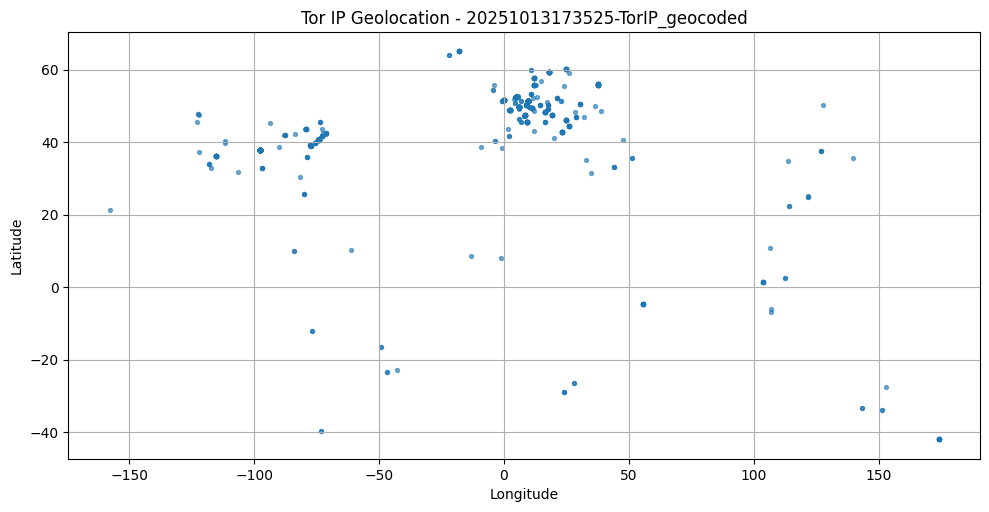

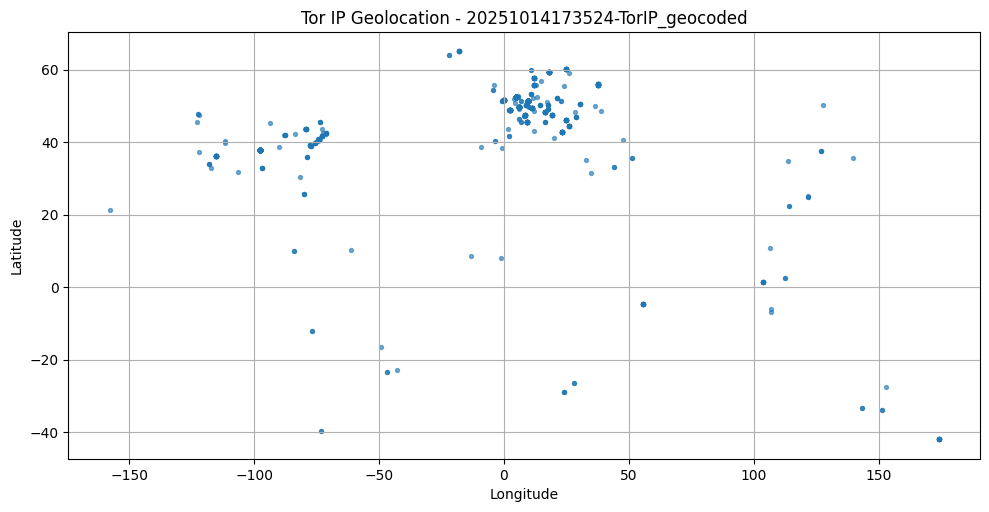

In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt

# ====== 設定 ======
ZIP_PATH = "./isolation_forest.zip"
EXTRACT_DIR = "./isolation_forest_all"

# ====== ZIPを展開 ======
os.makedirs(EXTRACT_DIR, exist_ok=True)
with zipfile.ZipFile(ZIP_PATH, "r") as zip_ref:
    zip_ref.extractall(EXTRACT_DIR)

# ====== CSVファイル一覧 ======
csv_files = []
for root, dirs, files in os.walk(EXTRACT_DIR):
    for f in files:
        if f.endswith(".csv"):
            csv_files.append(os.path.join(root, f))

csv_files.sort()  # 日付順に並べる
print(f"発見されたCSVファイル数: {len(csv_files)}")

# ====== 各CSVを順にプロット ======
for path in csv_files:
    try:
        df = pd.read_csv(path)

        # 緯度経度列を自動検出
        lat_col = [c for c in df.columns if "lat" in c.lower()][0]
        lon_col = [c for c in df.columns if "lon" in c.lower()][0]

        plt.figure(figsize=(10, 5))
        plt.scatter(df[lon_col], df[lat_col], s=8, alpha=0.6)
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.grid(True)
        plt.tight_layout()

        # タイトル表示
        fname = os.path.basename(path).replace(".csv", "")
        plt.title(f"Tor IP Geolocation - {fname}")

        # グラフ表示
        plt.show()

    except Exception as e:
        print(f"⚠️ {path} の処理中にエラー: {e}")
